In [18]:
%reset

import os
import sys

# Very hacky, bad thing to do.
SRC_PATH = os.path.realpath('../src')
sys.path.append(SRC_PATH)

from analysis import f0, sp, ap, sr, start, end, single_cycles

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [19]:
import IPython.display as ipd
import pyworld as pw
import matplotlib.pyplot as plt
import numpy as np

In [20]:
# Experimenting with cycling vibrato spectral envelopes.

num_cycles = 10
sp_ = np.tile(sp[start:end, :], [num_cycles, 1])

f0_ = np.tile(np.mean(f0), sp_.shape[0])
ap_ = sp_ * 0

y = pw.synthesize(f0_, sp_, ap_, sr)

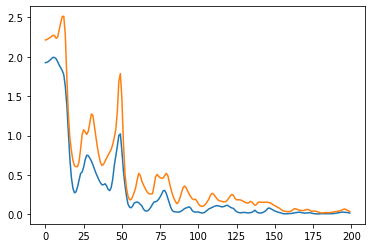

In [21]:
# Statistics from one vibrato cycle.

one_loop = np.sqrt(sp[start:end, :])

min_ = np.min(one_loop, axis=0)
max_ = np.max(one_loop, axis=0)

plt.plot(min_[:200])
plt.plot(max_[:200])
plt.show()

In [22]:
display(ipd.Audio(y, rate=sr))

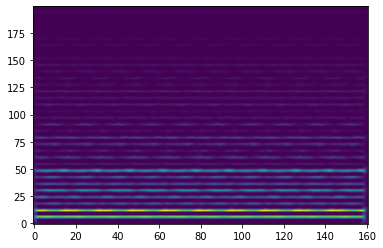

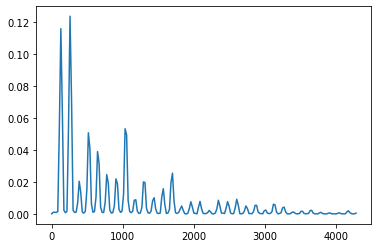

In [23]:
from scipy.signal import stft

stft_ = stft(y, fs=sr, nperseg=2048, noverlap=2048-512)[2]
spectrogram = np.abs(stft_)

plt.imshow(spectrogram[:200, :], origin='lower', aspect='auto')
plt.show()

f_ = np.arange(2048 // 2) / 2048 * sr 

plt.plot(f_[:200], spectrogram[:200, 3])
plt.show()

44100

## Video

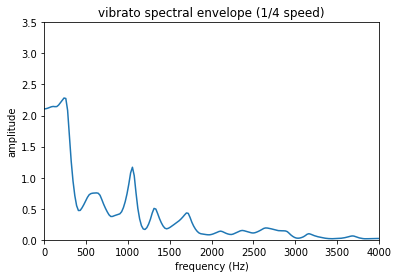

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Sqrt to go from power to linear spectrum.
env = np.sqrt(sp_)

f = np.linspace(0, 1, env.shape[1], endpoint=False) * (sr // 2) 
skip = 1

fig, ax = plt.subplots()
line, = ax.plot(f[::skip], env[0,:][::skip])
ax.set_ylim(0, 3.5)
ax.set_xlim(0, 4000)
ax.set_xlabel('frequency (Hz)')
ax.set_ylabel('amplitude')
ax.set_title('vibrato spectral envelope (1/4 speed)')

def update(i):
    new_data = env[i, :][::skip]
    line.set_ydata(new_data)
    return line,

ani = animation.FuncAnimation(fig, update, frames=env.shape[0], interval=20)
ipd.HTML(ani.to_html5_video())

# Assume f0 = 130.